In [31]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
from matplotlib import pyplot
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from statsmodels.tsa.stattools import acf
#import pandas.plotting.autocorrelation_plot
from pandas.tools.plotting import autocorrelation_plot
warnings.filterwarnings("ignore")

In [32]:
data = pd.read_csv('AirQuality.csv ', header=0, na_values=[-200])

In [33]:
print (data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255 

In [34]:
print(data.shape)

(9471, 17)


In [35]:
data = data.drop(columns=['Unnamed: 15','Unnamed: 16'])

In [36]:
print (data.shape)

(9471, 15)


In [37]:
data.mean()
all_cols = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)',
            'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

In [38]:
data = data.replace( -200 , np.nan )

In [39]:
data = data.dropna(how="all")
print(data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

In [40]:
data = data.fillna(method = 'ffill')

In [41]:
print(data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [43]:
data['Date']=pd.to_datetime(data['Date'])
print(data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

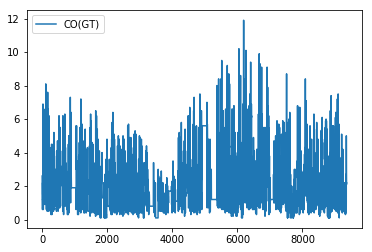

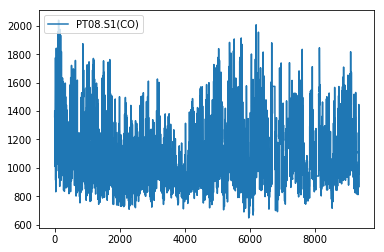

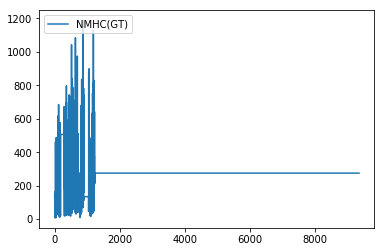

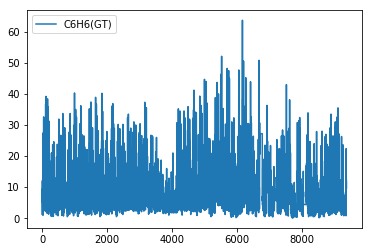

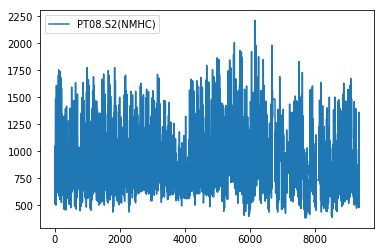

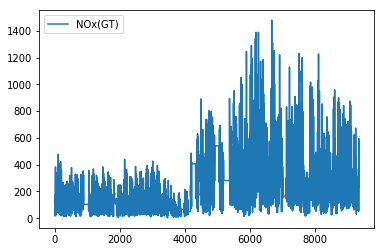

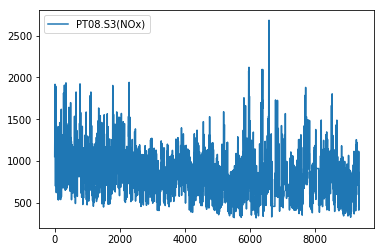

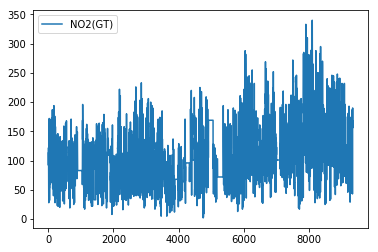

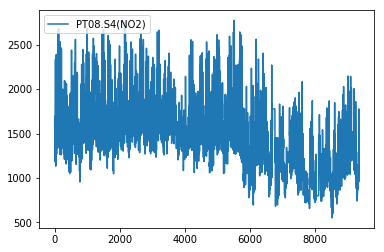

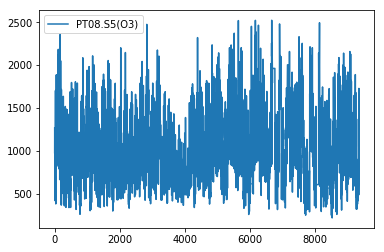

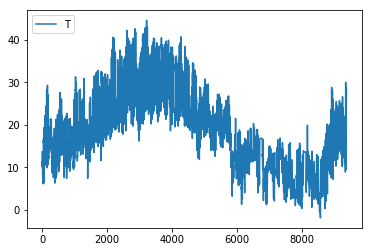

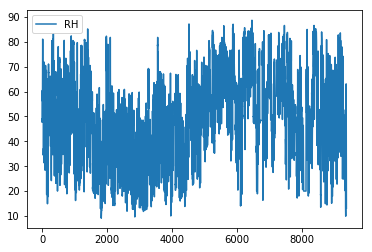

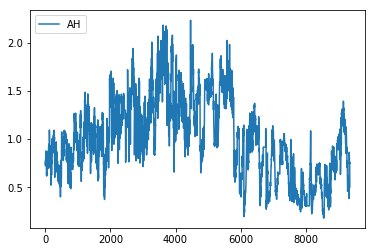

In [44]:
# Test for stationarity
# 1. plot and check
for i in all_cols:
    ts = data[i]
    plt.plot(ts)
    plt.legend([i], loc='upper left')
    plt.show()


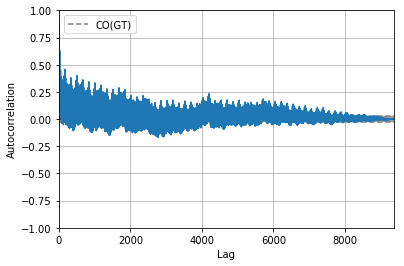

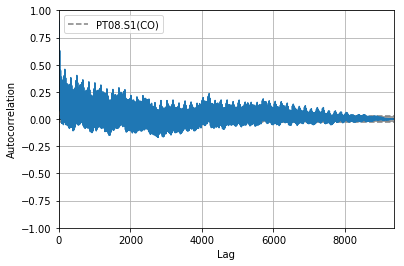

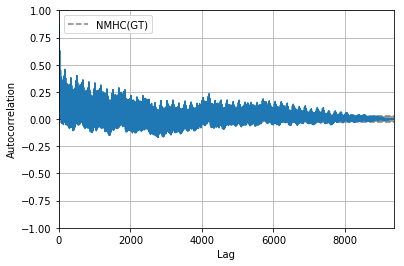

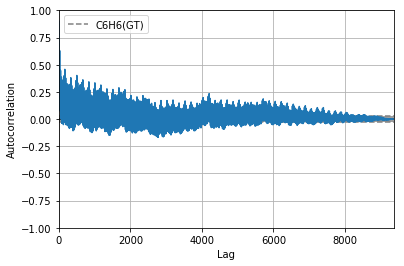

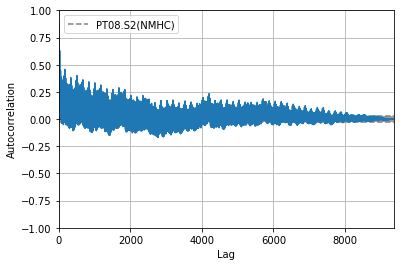

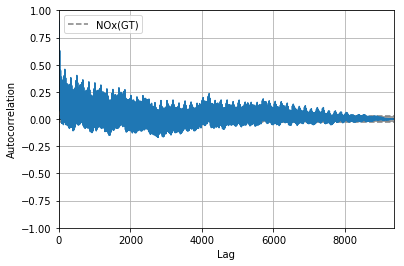

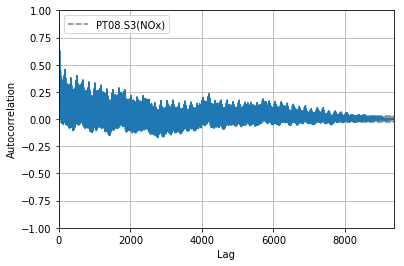

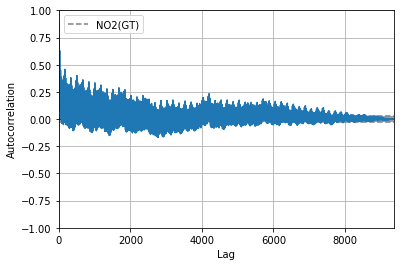

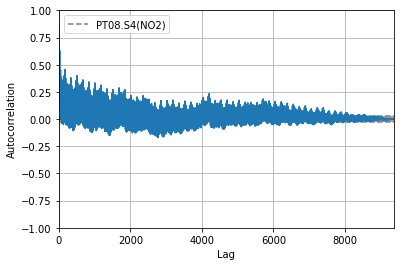

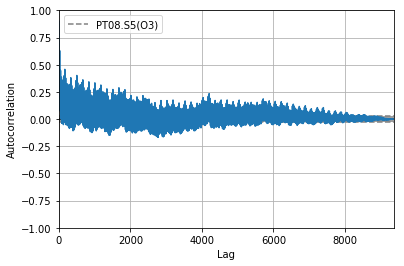

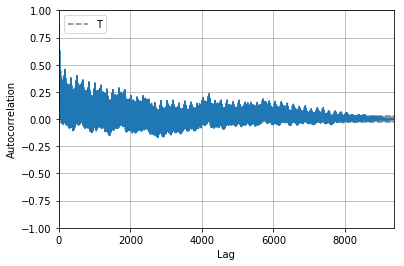

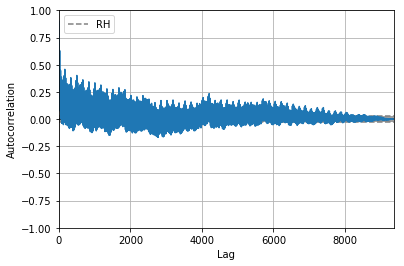

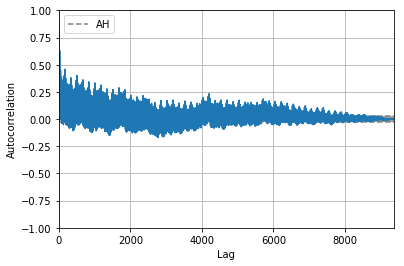

In [45]:
for i in all_cols:
    ts = data['CO(GT)']
    autocorrelation_plot(np.log(ts))
    plt.legend([i], loc='upper left')
    plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

for i in all_cols:
    if(i!='T'):
        ts= data[i]
        result = adfuller(log(ts.values))
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))


ADF Statistic: -9.485633
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -9.864353
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -8.817877
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -10.632571
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -10.429706
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -6.536872
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -9.651886
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -8.819331
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -6.220299
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -11.099953
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -7.607930
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -5.272781
p-value: 0.000006
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [46]:
Temp = data['T']
fp = open("temp.txt","w")
for i in Temp:
    fp.write(str(i))

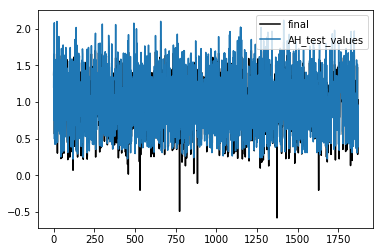

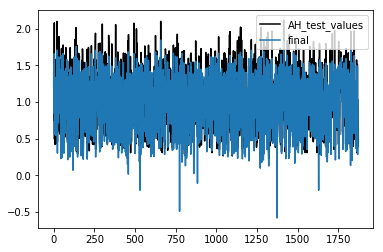

Accuracy(R^2 value) is  82.74355739440506


In [66]:
# attibutes and class labels
# 1. 'T' as class label
attributes = data
attributes = attributes.drop('Date', axis=1)
attributes = attributes.drop('Time', axis=1)
attributes = attributes.drop('RH', axis=1)
attributes = attributes.drop('AH', axis=1)
attributes = attributes.values
class_labels = data['AH'].values
class_labels1 = data['RH'].values

# Testing and Training using regression
X_train, X_test, y_train, y_test = train_test_split(attributes, class_labels, test_size=0.2) #X is features y is target labels
model = LinearRegression()
model.fit(X_train, y_train)  
final = model.predict(X_test)

plt.plot(final,color="black")
plt.plot(y_test)
plt.legend(['final', 'AH_test_values'], loc='upper right')
plt.show()
plt.plot(y_test,color="black")
plt.plot(final)
plt.legend(['AH_test_values', 'final'], loc='upper right')
plt.show()
print("Accuracy(R^2 value) is ", model.score(X_test, y_test)*100)